## Example Three Variable Gradient Descent

Consider the cost function with three variables:

$$J(\theta_1, \theta_2, \theta_3) = \theta_1^2 + 2\theta_2^2 + 3\theta_3^2$$

To minimize this cost function using gradient descent. The gradient of this cost function is as follows:

$
\nabla J(\theta_1, \theta_2, \theta_3) = \begin{bmatrix}
2\theta_1 \\
4\theta_2 \\
6\theta_3
\end{bmatrix}
$


**Initialization**:

Given the inital conditions:

- $\theta_1 = 1.0$
- $\theta_2 = 2.0$
- $\theta_3 = 3.0$
- $\alpha = 0.1$

**Iteration 1**:
1. Calculate the gradient at the current parameters:

   $\nabla J(\theta_1, \theta_2, \theta_3) = \begin{bmatrix}
   2 \cdot 1.0 \\
   4 \cdot 2.0 \\
   6 \cdot 3.0
   \end{bmatrix} = \begin{bmatrix}
   2 \\
   8 \\
   18
   \end{bmatrix}$

2. Update the parameters:

   $\theta_1 = \theta_1 - \alpha \cdot 2 = 1.0 - 0.1 \cdot 2 = 0.8$

   $\theta_2 = \theta_2 - \alpha \cdot 8 = 2.0 - 0.1 \cdot 8 = 1.2$

   $\theta_3 = \theta_3 - \alpha \cdot 18 = 3.0 - 0.1 \cdot 18 = 1.2$

**Iteration 2**:
1. Calculate the gradient at the updated parameters:

   $\nabla J(\theta_1, \theta_2, \theta_3) = \begin{bmatrix}
   2 \cdot 0.8 \\
   4 \cdot 1.2 \\
   6 \cdot 1.2
   \end{bmatrix} = \begin{bmatrix}
   1.6 \\
   4.8 \\
   7.2
   \end{bmatrix}$

2. Update the parameters:

   $\theta_1 = 0.8 - 0.1 \cdot 1.6 = 0.64$

   $\theta_2 = 1.2 - 0.1 \cdot 4.8 = 0.72$

   $\theta_3 = 1.2 - 0.1 \cdot 7.2 = 0.48$

**Stopping Criteria**:

Choose the stopping criteria tol and max iteratinos such that the algorithms stops when the parameter converges to within a tolerance $$\Sigma_{j=0}^2|\theta_{ji+1}-\theta_{ji}|<tol$$
   or the number of iterations reaches the max iterations. 
There are many possible formula for the stopping criteria the one of the most strigent is the max norm:
$$\max_{j}|\theta_{ji+1}-\theta_{ji}|<tol.$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Define the cost function
def quadratic_cost_function(theta):
    return theta[0]**2+2*theta[1]**2+3*theta[2]**2
# Define the gradient
def gradient(theta):
    return np.array([2*theta[0],4*theta[1],6*theta[2]])
# Gradient Descent parameters
learning_rate = 0.1  # Step size or learning rate
# Initial guess
theta_0 = np.array([1,2,3])
def gradient_descent(theta,learning_rate=0.1, tol=1e-6, max_iter=100):
    theta_history = [theta]
    cost_history = [quadratic_cost_function(theta)]
    for i in range(max_iter):
        # Update x using the gradient and learning rate
        theta_new = theta - learning_rate * gradient(theta)

        # Append the updated values to the history lists
        theta_history.append(theta_new)
        cost_history.append(quadratic_cost_function(theta_new))
        if np.sum(np.abs((theta-theta_new))) < tol:
            return theta,theta_history, cost_history,i
        theta=theta_new

    return theta,theta_history, cost_history,i

tol=0.001
max_iterations = 100     # Number of iterations
theta, theta_history, cost_history,I=gradient_descent(theta_0,learning_rate=learning_rate,tol=tol,max_iter=max_iterations)
# Print the final result
print(f'Optimal theta: {theta}')
print(f"Minimum Cost value: {quadratic_cost_function(theta)}")
print(f"Number of Interations I: {I}")

Optimal theta: [4.72236648e-03 9.47676268e-06 8.44424930e-10]
Minimum Cost value: 2.2300924816594426e-05
Number of Interations I: 24


In [2]:
theta_hist_array=np.array(theta_history)
theta_hist_array

array([[1.00000000e+00, 2.00000000e+00, 3.00000000e+00],
       [8.00000000e-01, 1.20000000e+00, 1.20000000e+00],
       [6.40000000e-01, 7.20000000e-01, 4.80000000e-01],
       [5.12000000e-01, 4.32000000e-01, 1.92000000e-01],
       [4.09600000e-01, 2.59200000e-01, 7.68000000e-02],
       [3.27680000e-01, 1.55520000e-01, 3.07200000e-02],
       [2.62144000e-01, 9.33120000e-02, 1.22880000e-02],
       [2.09715200e-01, 5.59872000e-02, 4.91520000e-03],
       [1.67772160e-01, 3.35923200e-02, 1.96608000e-03],
       [1.34217728e-01, 2.01553920e-02, 7.86432000e-04],
       [1.07374182e-01, 1.20932352e-02, 3.14572800e-04],
       [8.58993459e-02, 7.25594112e-03, 1.25829120e-04],
       [6.87194767e-02, 4.35356467e-03, 5.03316480e-05],
       [5.49755814e-02, 2.61213880e-03, 2.01326592e-05],
       [4.39804651e-02, 1.56728328e-03, 8.05306368e-06],
       [3.51843721e-02, 9.40369969e-04, 3.22122547e-06],
       [2.81474977e-02, 5.64221981e-04, 1.28849019e-06],
       [2.25179981e-02, 3.38533

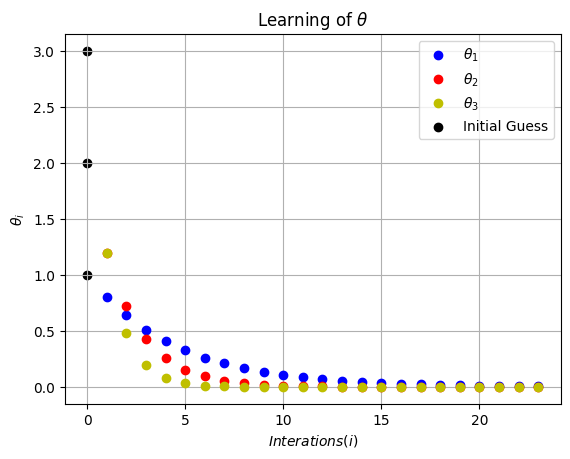

In [3]:
plt.scatter(0,theta_hist_array[0,0],  c='k', label='Initial Guess')
plt.scatter(0,theta_hist_array[0,1],  c='k')
plt.scatter(0,theta_hist_array[0,2],  c='k')

plt.plot(np.arange(1,I),theta_hist_array[1:I,0],'bo',label=r'$\theta_1$')
plt.plot(np.arange(1,I),theta_hist_array[1:I,1],'ro',label=r'$\theta_2$')
plt.plot(np.arange(1,I),theta_hist_array[1:I,2],'yo',label=r'$\theta_3$')
plt.xlabel(r'$Interations (i)$')
plt.ylabel(r'$\theta_i$')
plt.legend()
plt.grid(True)
plt.title(r'Learning of $\theta$')
plt.show()